In [4]:
import pandas as pd
df = pd.read_excel('Corelia People.xlsx', header= 1)

In [5]:
df.head()

,0 notifications total
0,NaN
1,"{""data"":{""entityUrn"":""urn:li:collectionRespons..."
2,"{""data"":{""entityUrn"":""urn:li:collectionRespons..."
3,Skip to search Skip to main content Close jump...
4,NaN


# EDA

In [6]:
#Expolartory Data analysis
print("Total Data")
display(df.shape)


Total Data


(7021, 1)

In [7]:
df.nunique()

0 notifications total    669
dtype: int64

# Data Cleaning

In [8]:
# View 10 most common words prior to text pre-processing
freq = pd.Series(' '.join(map(str, df['0 notifications total'])).split()).value_counts()[:10]
freq


nan           5805
3rd            272
LinkedIn       191
Member         189
DFI            160
·              158
connection     158
degree         156
at             146
Message        117
dtype: int64

In [9]:
# View 10 least common words prior to text pre-processing
freq1 =  pd.Series(' '.join(map(str,df['0 notifications total'])).split()).value_counts()[-10:]
freq1

Ahmad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [10]:
# Import libraries for text preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [11]:
#defining stopwords list
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

final_stopwords_list = list(fr_stop) + list(en_stop)+ ['cordialement'
,'bonjour'
,'ok'
,'http'
,'plus'
,'infogerance'
,'demande'
,'actualit'
,'bonsoir'
,'Http'
,'fi'
,'fr'
,'hello'
,'thank'
,'wondering'
,'merci'
,'best'
,'regard'
,'bon', 'linkedin', 'nan']

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Ahmed El
[nltk_data]     Agamy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [12]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []

df['word_count'] = df['0 notifications total'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(df.word_count)

for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(df['0 notifications total'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            final_stopwords_list] 
    text = " ".join(text)
    corpus.append(text)

In [13]:
#View sample pre-processed corpus item
corpus[5]


'search'

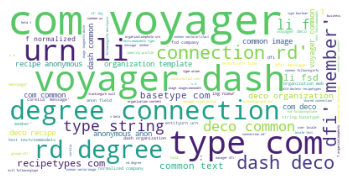

In [14]:
# Generate word cloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=final_stopwords_list,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.8,stop_words=final_stopwords_list, max_features=50000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'qu', 'quelqu', 've'] not in stop_words.
  warnings.warn(


In [17]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['data',
 'entityurn',
 'urn',
 'li',
 'collectionresponse',
 'wuwuxsq',
 'ipvqd',
 'qcpfkzzzl',
 'nsjuv',
 'kjpvhqnlppk']

# Extract most frequently occurring keywords and n-grams

         Keyword  Frequency
0            com        482
1           type        377
2        voyager        366
3             rd        273
4           dash        246
5         common        237
6           deco        220
7         member        197
8     connection        193
9            dfi        190
10            li        181
11           urn        178
12        degree        156
13        string        134
14       message        128
15  organization        117
16       company        110
17          text         88
18       corelia         76
19         image         73


[Text(0, 0, 'com'),
 Text(1, 0, 'type'),
 Text(2, 0, 'voyager'),
 Text(3, 0, 'rd'),
 Text(4, 0, 'dash'),
 Text(5, 0, 'common'),
 Text(6, 0, 'deco'),
 Text(7, 0, 'member'),
 Text(8, 0, 'connection'),
 Text(9, 0, 'dfi'),
 Text(10, 0, 'li'),
 Text(11, 0, 'urn'),
 Text(12, 0, 'degree'),
 Text(13, 0, 'string'),
 Text(14, 0, 'message'),
 Text(15, 0, 'organization'),
 Text(16, 0, 'company'),
 Text(17, 0, 'text'),
 Text(18, 0, 'corelia'),
 Text(19, 0, 'image')]

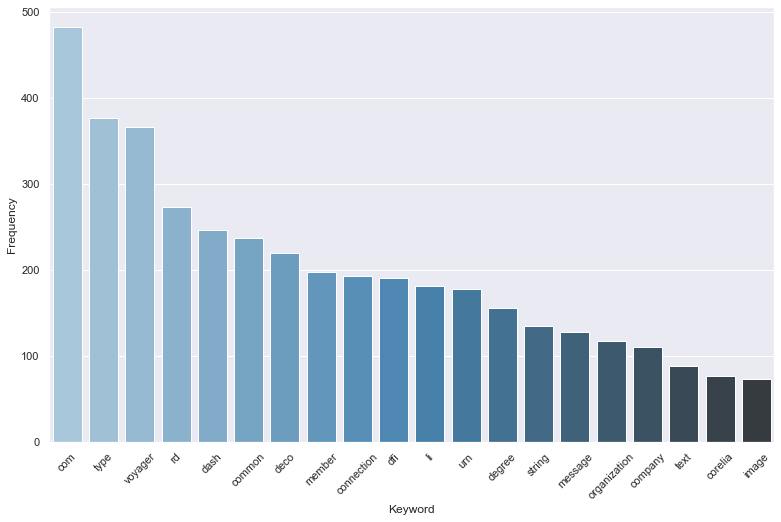

In [18]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)


# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)


                  Bi-gram  Frequency
0             com voyager        354
1            voyager dash        246
2                type com        211
3                  urn li        171
4       degree connection        156
5               rd degree        136
6           connection rd        136
7               dash deco        134
8             type string        102
9             deco common         86
10        recipetypes com         71
11            common text         61
12           basetype com         60
13                 li fsd         59
14      deco organization         58
15  organization template         58
16               com deco         57
17            deco recipe         57
18       recipe anonymous         57
19         anonymous anon         57


[Text(0, 0, 'com voyager'),
 Text(1, 0, 'voyager dash'),
 Text(2, 0, 'type com'),
 Text(3, 0, 'urn li'),
 Text(4, 0, 'degree connection'),
 Text(5, 0, 'rd degree'),
 Text(6, 0, 'connection rd'),
 Text(7, 0, 'dash deco'),
 Text(8, 0, 'type string'),
 Text(9, 0, 'deco common'),
 Text(10, 0, 'recipetypes com'),
 Text(11, 0, 'common text'),
 Text(12, 0, 'basetype com'),
 Text(13, 0, 'li fsd'),
 Text(14, 0, 'deco organization'),
 Text(15, 0, 'organization template'),
 Text(16, 0, 'com deco'),
 Text(17, 0, 'deco recipe'),
 Text(18, 0, 'recipe anonymous'),
 Text(19, 0, 'anonymous anon')]

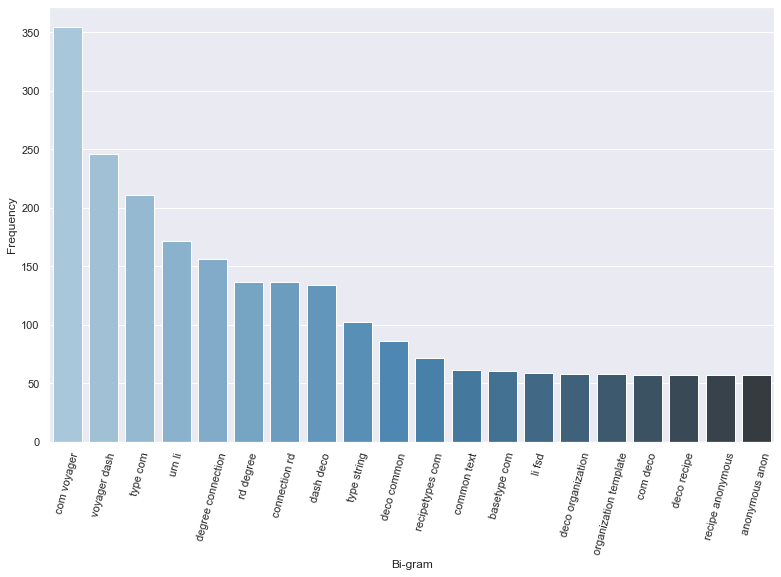

In [19]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)


# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)


                     Tri-gram  Frequency
0            com voyager dash        245
1            type com voyager        155
2        rd degree connection        136
3        degree connection rd        136
4           voyager dash deco        134
5            dash deco common         86
6     recipetypes com voyager         70
7        basetype com voyager         60
8                  urn li fsd         59
9             com deco recipe         57
10      deco recipe anonymous         57
11      recipe anonymous anon         57
12        voyager dash common         50
13         com voyager common         48
14            type com common         41
15          urn li normalized         38
16      li normalized company         38
17           deco common text         36
18      entityurn type string         33
19  voyager dash organization         33


[Text(0, 0, 'com voyager dash'),
 Text(1, 0, 'type com voyager'),
 Text(2, 0, 'rd degree connection'),
 Text(3, 0, 'degree connection rd'),
 Text(4, 0, 'voyager dash deco'),
 Text(5, 0, 'dash deco common'),
 Text(6, 0, 'recipetypes com voyager'),
 Text(7, 0, 'basetype com voyager'),
 Text(8, 0, 'urn li fsd'),
 Text(9, 0, 'com deco recipe'),
 Text(10, 0, 'deco recipe anonymous'),
 Text(11, 0, 'recipe anonymous anon'),
 Text(12, 0, 'voyager dash common'),
 Text(13, 0, 'com voyager common'),
 Text(14, 0, 'type com common'),
 Text(15, 0, 'urn li normalized'),
 Text(16, 0, 'li normalized company'),
 Text(17, 0, 'deco common text'),
 Text(18, 0, 'entityurn type string'),
 Text(19, 0, 'voyager dash organization')]

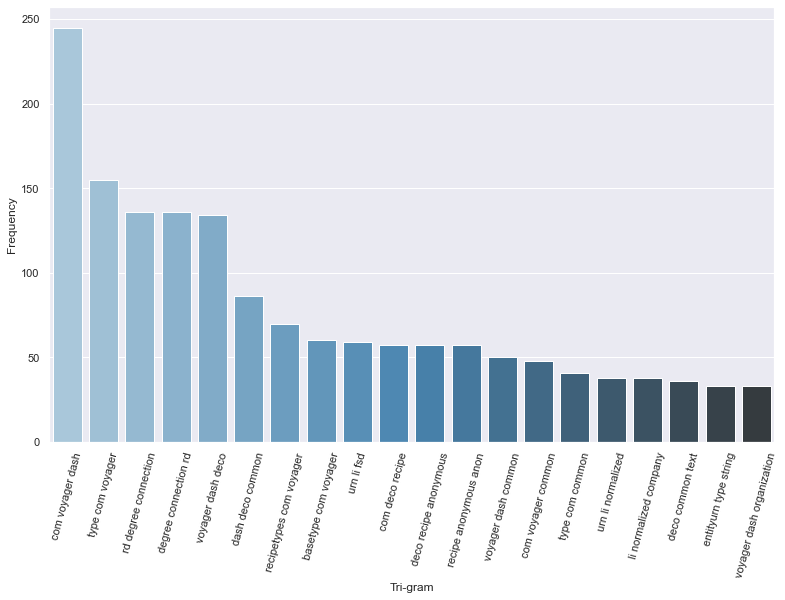

In [20]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=30000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)


# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)


In [73]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents

from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
data entityurn urn li collectionresponse isx ngl ineqjyosblzh kixb m zz xgqrwo p element card valueunion entitycard secondarysubtitle textdirection user locale text showcase page attributesv recipetypes com linkedin voyager dash deco common text textviewmodelv type com linkedin voyager dash common text textviewmodel entitylockupview image attribute detaildata companylogo urn li fsd company detaildataunion companylogo urn li fsd company recipetypes com linkedin voyager dash deco common image imageattribute type com linkedin voyager dash common image imageattribute recipetypes com linkedin voyager dash deco common image imageviewmodel type com linkedin voyager dash common image imageviewmodel subtitle textdirection user locale text information technology service attributesv recipetypes com linkedin voyager dash deco common text textviewmodelv type com linkedin voyager dash common text textviewmodel navigationurl http www linkedin com showcase high perf computing hpc title text

# Classify Tickets by Equipe

In [91]:
import sys
import nltk
import numpy as np
import pandas as pd
import pickle
# from helpers import *
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from matplotlib import pyplot as plt


In [94]:
dfTickets = df.copy()


TypeError: 'Index' object is not callable

In [95]:
dfTickets.head(4)

,ID,Équipe,Enoncé,word_count
0,55019,PILOTAGE,Bonsoir Notre outil de supervision a remo...,49
1,55020,PILOTAGE,"Bonjour, Notre plateforme de supervision ...",49
2,55021,PILOTAGE,"Bonjour, Message reçu dans QSYSOPR T...",271
3,55023,SUPPORT BT NETAPP,"Bonjour, Notre outil de supervision nous ...",138


In [98]:
dfTickets.rename(columns = {'Équipe':'Equipment', 'Enoncé':'Ticket'}, inplace = True)

In [99]:
dfTickets.head(4)

,ID,Equipment,Ticket,word_count
0,55019,PILOTAGE,Bonsoir Notre outil de supervision a remo...,49
1,55020,PILOTAGE,"Bonjour, Notre plateforme de supervision ...",49
2,55021,PILOTAGE,"Bonjour, Message reçu dans QSYSOPR T...",271
3,55023,SUPPORT BT NETAPP,"Bonjour, Notre outil de supervision nous ...",138


In [100]:
dfTickets.Equipment.value_counts()

PILOTAGE               53719
WINDOWS                 8815
AS400                   6437
IT INTERNE              3517
SAUVEGARDE              3144
RESEAUX                 2849
LINUX                   2322
SDM                     1785
COBICOM                 1461
BT TOOLS                1325
SUPPORT PLA             1195
PROD APPLICATIVE        1018
DBA                      861
SAP                      216
DIR-PROD                 137
SUPPORT BT NETAPP         77
PROJET RC                 53
OPENINFO                  45
SG-IS-SUPPORT             32
AIX                        9
TOYS-INNERWORK             8
DATACENTER                 8
SUPPORT QUICK-EDD          5
INFOGERANCE GLOBALE        1
SUPPORT BT                 1
OZITEM                     1
Name: Equipment, dtype: int64

In [101]:
column_to_predict = "Equipment"


classifier = "SVM"  # can also use "SVM" 

use_grid_search = True  # find hyperparameters
remove_stop_words = True  # removes stop words from processed text
stop_words_lang = final_stopwords_list # used with 'remove_stop_words' 
use_stemming = False  
fit_prior = True  
min_data_per_class = 5  # used to determine number of samples required for each class.Classes with less than that will be excluded from the dataset

In [105]:
text_columns = "Ticket"  #text columns used for TF-IDF

'''# Removing rows related to classes represented by low amount of data
print("Shape of dataset before removing classes with less then " + str(min_data_per_class) + " rows: "+str(dfTickets.shape))
print("Number of classes before removing classes with less then " + str(min_data_per_class) + " rows: "+str(len(np.unique(dfTickets[column_to_predict]))))
bytag = dfTickets.groupby(column_to_predict).aggregate(np.count_nonzero)
tags = bytag[bytag > min_data_per_class].index
dfTickets = dfTickets[dfTickets[column_to_predict].isin(tags)]
print(
    "Shape of dataset after removing classes with less then "
    + str(min_data_per_class) + " rows: "
    + str(dfTickets.shape)
)
print(
    "Number of classes after removing classes with less then "
    + str(min_data_per_class) + " rows: "
    + str(len(np.unique(dfTickets[column_to_predict])))
)'''

'# Removing rows related to classes represented by low amount of data\nprint("Shape of dataset before removing classes with less then " + str(min_data_per_class) + " rows: "+str(dfTickets.shape))\nprint("Number of classes before removing classes with less then " + str(min_data_per_class) + " rows: "+str(len(np.unique(dfTickets[column_to_predict]))))\nbytag = dfTickets.groupby(column_to_predict).aggregate(np.count_nonzero)\ntags = bytag[bytag > min_data_per_class].index\ndfTickets = dfTickets[dfTickets[column_to_predict].isin(tags)]\nprint(\n    "Shape of dataset after removing classes with less then "\n    + str(min_data_per_class) + " rows: "\n    + str(dfTickets.shape)\n)\nprint(\n    "Number of classes after removing classes with less then "\n    + str(min_data_per_class) + " rows: "\n    + str(len(np.unique(dfTickets[column_to_predict])))\n)'

In [109]:
labelData = dfTickets[column_to_predict]
data = dfTickets[text_columns]

# Split dataset into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labelData, test_size=0.2
)  # split data to train/test sets with 80:20 ratio

In [111]:
labelData.fillna(method= 'ffill', inplace= True)

In [112]:
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        stemmer = SnowballStemmer(final_stopwords_list, ignore_stopwords=True)
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [113]:
# Count vectorizer
if remove_stop_words:
    count_vect = CountVectorizer(stop_words=final_stopwords_list)
elif use_stemming:
    count_vect = StemmedCountVectorizer(stop_words=final_stopwords_list)
else:
    count_vect = CountVectorizer()

vectorized_data = count_vect.fit_transform(train_data)
vectorized_data.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'qu', 'quelqu', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(71246, 111595)

In [114]:
tfidf = TfidfTransformer()
features = tfidf.fit_transform(vectorized_data)
features.shape

(71246, 111595)

In [115]:
text_clf = Pipeline([
        ('vect', count_vect),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(fit_prior=fit_prior))
    ])
text_clf = text_clf.fit(train_data, train_labels)

In [116]:
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
        'tfidf__use_idf': (True, False),
        'clf__alpha': (1e-2, 1e-3)
    }

    # Next, we create an instance of the grid search by passing the classifier, parameters
    # and n_jobs=-1 which tells to use multiple cores from user machine.
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_data, train_labels)

    # To see the best mean score and the params, run the following code
gs_clf.best_score_
gs_clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'qu', 'quelqu', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [117]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [118]:
print("Evaluating model")
# Score and evaluate model on test data using model without hyperparameter tuning
predicted = text_clf.predict(test_data)
prediction_acc = np.mean(predicted == test_labels)
print("Confusion matrix without GridSearch:")
print(metrics.confusion_matrix(test_labels, predicted))
print("Mean without GridSearch: " + str(prediction_acc))

# Score and evaluate model on test data using model WITH hyperparameter tuning
if use_grid_search:
    predicted = gs_clf.predict(test_data)
    prediction_acc = np.mean(predicted == test_labels)
    print("Confusion matrix with GridSearch:")
    print(metrics.confusion_matrix(test_labels, predicted))
    print("Mean with GridSearch: " + str(prediction_acc))

Evaluating model
Confusion matrix without GridSearch:
[[    0     0     0     0     0     0     0     0     0     0     3     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0   667     0     0     0     0     1     0     0     0   601     2
      0     0     0     0     0     0     0     0     0     0     8]
 [    0     0     0     0     0     0     0     1     0     0   215     0
      0     7     0     0     0     0     0     0     0     0    37]
 [    0     0     0   205     0     0     0     0     0     0    94     0
      0     0     0     0     0     0     0     0     0     0     1]
 [    0     0     0     0     0     0     0     0     0     0   165     0
      0     0     0     0     0     0     0     0     0     0     9]
 [    0     0     0     0     0     0     0     0     0     0    14     0
      0     0     0     0     0     0     0     0     0     0     6]
 [    0     0     0     0     0     0   448     0     0     0   268     0
      0     0 

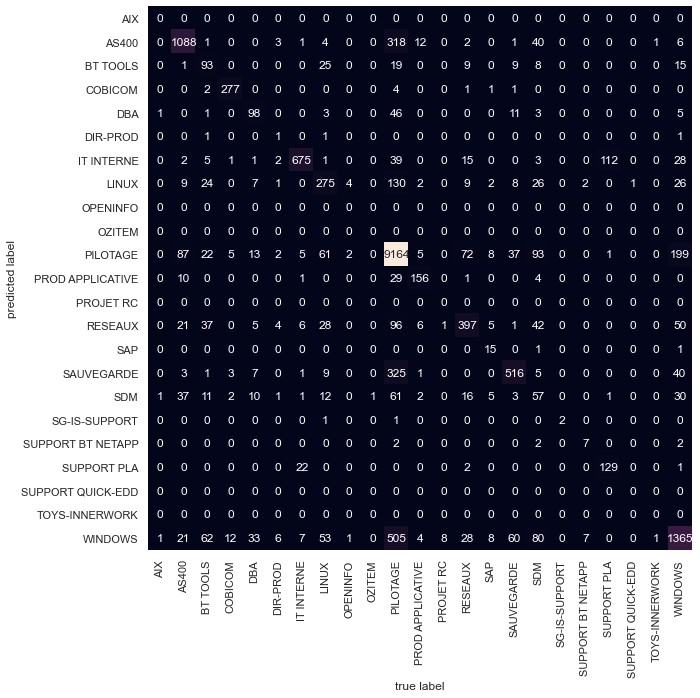

In [119]:
# Ploting confusion matrix with 'seaborn' module

%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
mat = confusion_matrix(test_labels, predicted)
plt.figure(figsize=(10, 10))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [120]:
%matplotlib inline
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted,
                            target_names=np.unique(test_labels)))

                   precision    recall  f1-score   support

              AIX       0.00      0.00      0.00         3
            AS400       0.74      0.85      0.79      1279
         BT TOOLS       0.52      0.36      0.42       260
          COBICOM       0.97      0.92      0.95       300
              DBA       0.58      0.56      0.57       174
         DIR-PROD       0.25      0.05      0.08        20
       IT INTERNE       0.76      0.94      0.84       719
            LINUX       0.52      0.58      0.55       473
         OPENINFO       0.00      0.00      0.00         7
           OZITEM       0.00      0.00      0.00         1
         PILOTAGE       0.94      0.85      0.89     10739
 PROD APPLICATIVE       0.78      0.83      0.80       188
        PROJET RC       0.00      0.00      0.00         9
          RESEAUX       0.57      0.72      0.63       552
              SAP       0.88      0.34      0.49        44
       SAUVEGARDE       0.57      0.80      0.66       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Time spent by type (Statistics)

In [ ]:
#creating separate data set

time_subset=df[['Creation-date', 'Type', 'Treatment Date']].fillna('')


In [ ]:
#preparing date cols
time_subset['Creation-date']=time_subset['Creation-date'].str.replace(r'\[CET]','')
time_subset['Creation-date']=time_subset['Creation-date'].str.replace(r'\[CEST]','')
time_subset['Treatment Date']=time_subset['Treatment Date'].str.replace(r'\[CET]','')
time_subset['Treatment Date']=time_subset['Treatment Date'].str.replace(r'\[CEST]','')
time_subset['Creation-date']=time_subset['Creation-date'].str.strip()
time_subset['Treatment Date']= time_subset['Treatment Date'].str.strip()

In [ ]:
#converting cols to datetime obj
time_subset['Creation-date']= pd.to_datetime(time_subset['Creation-date'], format= '%m/%d/%Y %H:%M')
time_subset['Treatment Date']= pd.to_datetime(time_subset['Treatment Date'], infer_datetime_format=True)

In [ ]:
#getting duration
time_subset['duration']= (time_subset['Treatment Date']-time_subset['Creation-date'])

In [ ]:
#converting timedelta to secs
time_subset['duration']
time_subset['duration'] =time_subset['duration'] / np.timedelta64(1, 's')

In [ ]:
grouped= time_subset.groupby('Type')['duration'].value_counts()
grouped

In [ ]:
 result = time_subset.groupby(['Type'], as_index=False).agg(
                      {'duration':['mean','std', 'median','sum', 'max']})

In [ ]:
#results for time analysis per type
result

# Analyze tickets and return 5 solutions similar

In [75]:
df.head(1)

,0 notifications total,word_count
0,NaN,1


In [124]:
#loading data
data1 = df['Enoncé'].dropna()

In [125]:
data1

0         Bonsoir     Notre outil de supervision a remo...
1         Bonjour,     Notre plateforme de supervision ...
2         Bonjour,     Message reçu dans QSYSOPR      T...
3         Bonjour,     Notre outil de supervision nous ...
4         Bonjour,     Host: FRVE-SRV-H34VM  @NAT : 10....
                               ...                        
89053     Bonsoir,     nous avons une alerte sur notre ...
89054     Origine: Samir BEDOUHENE - 2020-09-30 21:05:4...
89055     Origine: ITORAD03 - 2020-09-30 21:06:14 CEST ...
89056    Bonjour, Notre outil de supervision nous remon...
89057     Bonjour,                         Notre platef...
Name: Enoncé, Length: 89058, dtype: object

In [126]:
#vectorizing data, Incident subject can also be used
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=final_stopwords_list)

X = vectorizer.fit_transform(data1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'qu', 'quelqu', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [127]:
X

<89058x128540 sparse matrix of type '<class 'numpy.float64'>'
	with 3075485 stored elements in Compressed Sparse Row format>

In [128]:
#training k nearest neighbous
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors (n_neighbors=5, metric='cosine')
neigh.fit(X)



NearestNeighbors(metric='cosine')

In [129]:
#safety measure
terms = count_vect.get_feature_names()

In [136]:
input_texts = input('Enter your Ticket: ')

Enter your Ticket: bonjour, notre server ist malade


In [137]:
#self made func to return 5 similar tickets

def get_5_Tickets(input_texts):
    input_texts=[input_texts]
    input_features = vectorizer.transform(input_texts)
    D, N= neigh.kneighbors(input_features, n_neighbors= 5, return_distance=True)
    for input_text, distances, neighbors in zip(input_texts, D, N):
        print("Input text = ", input_text[:200], "\n")
        for dist, neighbor_idx in zip(distances, neighbors):
            print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
            print(df['Enoncé'][neighbor_idx][:200])
            print("-"*200)
        print("="*200)
        print()

In [138]:
get_5_Tickets(input_texts)

Input text =  bonjour, notre server ist malade 

Distance =  0.5706439318416776 Neighbor idx =  1699
 Origine: riotinto-hd.servicedesk2@atos-services.net - 2016-02-11 19:05  Message:   Bonjour,     Afin de finaliser la fermeture des tickets dans notre outils de ticktting, pourriez-vous nous communiqu
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.6632976610287157 Neighbor idx =  3444
 For keep you informed,     PHPVT-FILE, PHPVT-ISA, PHPVT-FS, PHPVT-APPLI, PHPVT-ACOD     all servers will be shutdown on 27th March 2016 ( 6:00 am IST time ) till 27th March 2016 ( 7:00 pm IST time ).
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.7128002305750365 Neighbor idx

# Speech Recognition

In [139]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


In [141]:
conda install pyaudio

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pyaudio


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    portaudio-19.6.0           |       he774522_4         202 KB
    pyaudio-0.2.11             |   py38he774522_2         206 KB
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  portaudio          pkgs/main/win-64::portaudio-19.6.0-he774522_4
  pyaudio            pkgs/main/win-64::pyaudio-0.2.11-py38he774522_2

The following packages will be UPDATED:


Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0




pyaudio-0.2.11       | 206 KB    |            |   0% 
pyaudio-0.2.11       | 206 KB    | 7          |   8% 
pyaudio-0.2.11       | 206 KB    | ########## | 100% 
pyaudio-0.2.11       | 206 KB    | ########## | 100% 

portaudio-19.6.0     | 202 KB    |            |   0% 
portaudio-19.6.0     | 202 KB    | 7          |   8% 
portaudio-19.6.0     | 202 KB    | ########## | 100% 
portaudio-19.6.0     | 202 KB    | ########## | 100% 

conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    |            |   1% 
conda-4.10.3         | 2.9 MB    | 4          |   5% 
conda-4.10.3         | 2.9 MB    | #7         |  17% 
conda-4.10.3         | 2.9 MB    | ##8        |  28% 
conda-4.10.3         | 2.9 MB    | ###3       |  34% 
conda-4.10.3         | 2.9 MB    | ####8      |  48% 
conda-4.10.3         | 2.9 MB    | #####6     |  56% 
conda-4.10.3         | 2.9 MB    | ######3  

In [ ]:
import speech_recognition as sr

r = sr.Recognizer()

with sr.AudioFile('Recording.wav') as source:
    audio = r.record(source)

text= r.recognize_google(audio)

In [ ]:
#can be input into model to recieve ticket similarity
text

In [ ]:
get_neigbors(text)